In [31]:
import numpy as np 
import tensorflow as tf 
from tensorflow import keras

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%tensorflow_version 2.x

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

# MNIST dataset

In [33]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255

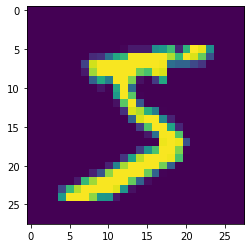

In [34]:
plt.imshow(x_train[0])

# Simple Deterministic MNIST Model

In [35]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(1280, activation="relu"),
  tf.keras.layers.Dense(1280, activation="relu"),
  tf.keras.layers.Dense(10),
])

In [36]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [37]:
model.fit(x_train, y_train,epochs=6,validation_data=(x_test, y_test))

Epoch 1/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2918 - sparse_categorical_accuracy: 0.9089 - val_loss: 0.1122 - val_sparse_categorical_accuracy: 0.9647
Epoch 2/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0861 - sparse_categorical_accuracy: 0.9725 - val_loss: 0.0959 - val_sparse_categorical_accuracy: 0.9711
Epoch 3/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0591 - sparse_categorical_accuracy: 0.9812 - val_loss: 0.0813 - val_sparse_categorical_accuracy: 0.9774
Epoch 4/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0442 - sparse_categorical_accuracy: 0.9865 - val_loss: 0.0834 - val_sparse_categorical_accuracy: 0.9762
Epoch 5/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0347 - sparse_categorical_accuracy: 0.9894 - val_loss: 0.0985 - val_sparse_categorical_accuracy: 0.9744
Epoch 6/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0281 - sparse_cate

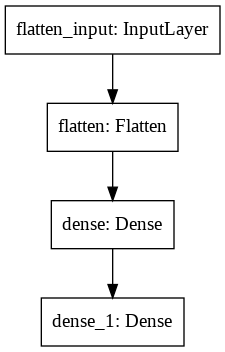

In [8]:
tf.keras.utils.plot_model(model)

In [39]:
results = model(x_test)

In [40]:
results[:20].numpy().argmax(axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4])

In [41]:
y_test[:20]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4],
      dtype=uint8)

# Variational Autoencoder